In [38]:
import pandas as pd

# Load the dataset
df = pd.read_excel(r"C:\Users\tusha\Downloads\Jar assignment\Walmart Sales.xlsx")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
print(df)

      Invoice ID Branch       City Customer type  Gender            Product line  Unit price  Quantity       Date      Time      Payment  Rating
0    750-67-8428      A     Yangon        Member  Female       Health and beauty       74.69         7   1/5/2019  13:08:00      Ewallet     9.1
1    226-31-3081      A  Naypyitaw        Normal  Female  Electronic accessories       15.28         5   3/8/2019  10:29:00         Cash     9.6
2    631-41-3108      A     Yangon        Normal    Male      Home and lifestyle       46.33         7   3/3/2019  13:23:00  Credit card     7.4
3    123-19-1176      B     Yangon        Member    Male       Health and beauty       58.22         8  1/27/2019  20:33:00      Ewallet     8.4
4    373-73-7910      C     Yangon        Normal    Male       Sports and travel       86.31         7   2/8/2019  10:37:00      Ewallet     5.3
5    699-14-3026      B  Naypyitaw        Normal    Male  Electronic accessories       85.39         7  3/25/2019  18:30:00      E

In [39]:
# Group the data by city and branch and calculate total sales and revenue
city_branch_sales = df.groupby(['City', 'Branch']).agg({'Quantity': 'sum', 'Unit price': 'sum'}).reset_index()
city_branch_sales.rename(columns={'Quantity': 'Total Quantity Sold', 'Unit price': 'Total Revenue'}, inplace=True)
print(city_branch_sales)

        City Branch  Total Quantity Sold  Total Revenue
0   Mandalay      A                  637        6349.11
1   Mandalay      B                  664        6623.73
2   Mandalay      C                  519        5506.04
3  Naypyitaw      A                  648        5953.55
4  Naypyitaw      B                  604        6298.64
5  Naypyitaw      C                  579        6315.57
6     Yangon      A                  598        6342.88
7     Yangon      B                  631        6329.25
8     Yangon      C                  630        5953.36


In [40]:
# Group the data by city, branch, and product line to calculate average price
average_price = df.groupby(['City', 'Branch']).agg({'Unit price': 'mean'}).reset_index()
average_price.rename(columns={'Unit price': 'Average Price'}, inplace=True)
print(average_price)


        City Branch  Average Price
0   Mandalay      A      53.353866
1   Mandalay      B      56.133305
2   Mandalay      C      57.958316
3  Naypyitaw      A      54.123182
4  Naypyitaw      B      57.785688
5  Naypyitaw      C      57.941009
6     Yangon      A      55.639298
7     Yangon      B      56.011062
8     Yangon      C      52.684602


In [41]:

# Convert 'Date' column to datetime format with MM/DD/YYYY format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Extract month and year from the Date column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Group by Month, Product line, Gender, and Payment Method to analyze sales and revenue
sales_analysis = df.groupby(['Year', 'Month', 'Product line', 'Gender', 'Payment']).agg({'Quantity': 'sum', 'Unit price': 'sum'}).reset_index()
sales_analysis.rename(columns={'Quantity': 'Total Quantity Sold', 'Unit price': 'Total Revenue'}, inplace=True)

# Calculate Month-over-Month change in sales and revenue
sales_analysis['Sales Change (%)'] = sales_analysis.groupby(['Product line', 'Gender', 'Payment'])['Total Quantity Sold'].pct_change() * 100
sales_analysis['Revenue Change (%)'] = sales_analysis.groupby(['Product line', 'Gender', 'Payment'])['Total Revenue'].pct_change() * 100

# Since we don't have April data, focus on the preceding months
pre_april_sales_analysis = sales_analysis[(sales_analysis['Year'] == 2019) & (sales_analysis['Month'] < 4)]

# Identify potential focus areas for improvement based on preceding months
focus_areas = pre_april_sales_analysis.copy()  # Copying entire analysis for focus areas

# Print potential focus areas for improvement
print("Potential Focus Areas for Improvement Based on Preceding Months:")
print(focus_areas)

Potential Focus Areas for Improvement Based on Preceding Months:
     Year  Month            Product line  Gender      Payment  Total Quantity Sold  Total Revenue  Sales Change (%)  Revenue Change (%)
0    2019      1  Electronic accessories  Female         Cash                   52         534.48               NaN                 NaN
1    2019      1  Electronic accessories  Female  Credit card                   54         371.20               NaN                 NaN
2    2019      1  Electronic accessories  Female      Ewallet                   43         251.77               NaN                 NaN
3    2019      1  Electronic accessories    Male         Cash                   62         552.72               NaN                 NaN
4    2019      1  Electronic accessories    Male  Credit card                   43         433.88               NaN                 NaN
5    2019      1  Electronic accessories    Male      Ewallet                   79         806.16               NaN    

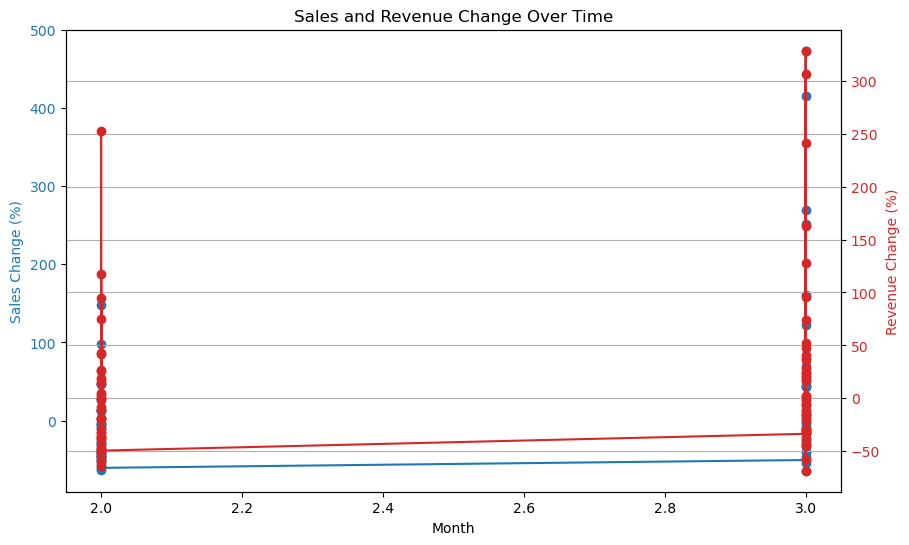

In [42]:
import matplotlib.pyplot as plt

# Create a function to plot sales change percentage and revenue change percentage over time with dual y-axes
def plot_change_over_time_dual_axis(data, title):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot sales change percentage
    ax1.plot(data['Month'], data['Sales Change (%)'], color='tab:blue', marker='o', label='Sales Change (%)')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Sales Change (%)', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()  # instantiate a second y-axis that shares the same x-axis

    # Plot revenue change percentage
    ax2.plot(data['Month'], data['Revenue Change (%)'], color='tab:red', marker='o', label='Revenue Change (%)')
    ax2.set_ylabel('Revenue Change (%)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    plt.title(title)
    plt.grid(True)
    plt.show()

# Plot sales change percentage and revenue change percentage over time with dual y-axes
plot_change_over_time_dual_axis(sales_analysis, "Sales and Revenue Change Over Time")


In [43]:
import calendar

def total_revenue_and_quantity_by_month(month):
    # Filter sales_analysis for the specified month
    month_sales = sales_analysis[sales_analysis['Month'] == month]
    
    # Group by Product line and calculate total revenue and quantity sold for the specified month
    revenue_and_quantity_by_product_line = month_sales.groupby('Product line').agg({'Total Revenue': 'sum', 'Total Quantity Sold': 'sum'}).reset_index()
    
    return revenue_and_quantity_by_product_line

# Get unique months present in the data
available_months = sales_analysis['Month'].unique()

# Convert month numbers to month names
month_names = [calendar.month_name[month] for month in available_months]

# Calculate and print total revenue and quantity sold for each available month, distinguished by product line
for month, month_name in zip(available_months, month_names):
    revenue_and_quantity_by_product_line = total_revenue_and_quantity_by_month(month)
    print(f"Total Revenue and Quantity Sold for {month_name} by Product Line:")
    print(revenue_and_quantity_by_product_line)
    print()  # Print a blank line for better readability between months
    
    # Calculate and print total revenue and quantity sold for the current month
    total_revenue_month = revenue_and_quantity_by_product_line['Total Revenue'].sum()
    total_quantity_sold_month = revenue_and_quantity_by_product_line['Total Quantity Sold'].sum()
    print(f"Total Revenue for {month_name}: {total_revenue_month}")
    print(f"Total Quantity Sold for {month_name}: {total_quantity_sold_month}\n")


Total Revenue and Quantity Sold for January by Product Line:
             Product line  Total Revenue  Total Quantity Sold
0  Electronic accessories        2950.21                  333
1     Fashion accessories        3543.65                  336
2      Food and beverages        3237.38                  325
3       Health and beauty        2857.81                  254
4      Home and lifestyle        3337.09                  342
5       Sports and travel        3827.75                  375

Total Revenue for January: 19753.89
Total Quantity Sold for January: 1965

Total Revenue and Quantity Sold for February by Product Line:
             Product line  Total Revenue  Total Quantity Sold
0  Electronic accessories        2938.94                  313
1     Fashion accessories        3716.89                  295
2      Food and beverages        3367.99                  349
3       Health and beauty        2486.34                  266
4      Home and lifestyle        2100.08                 

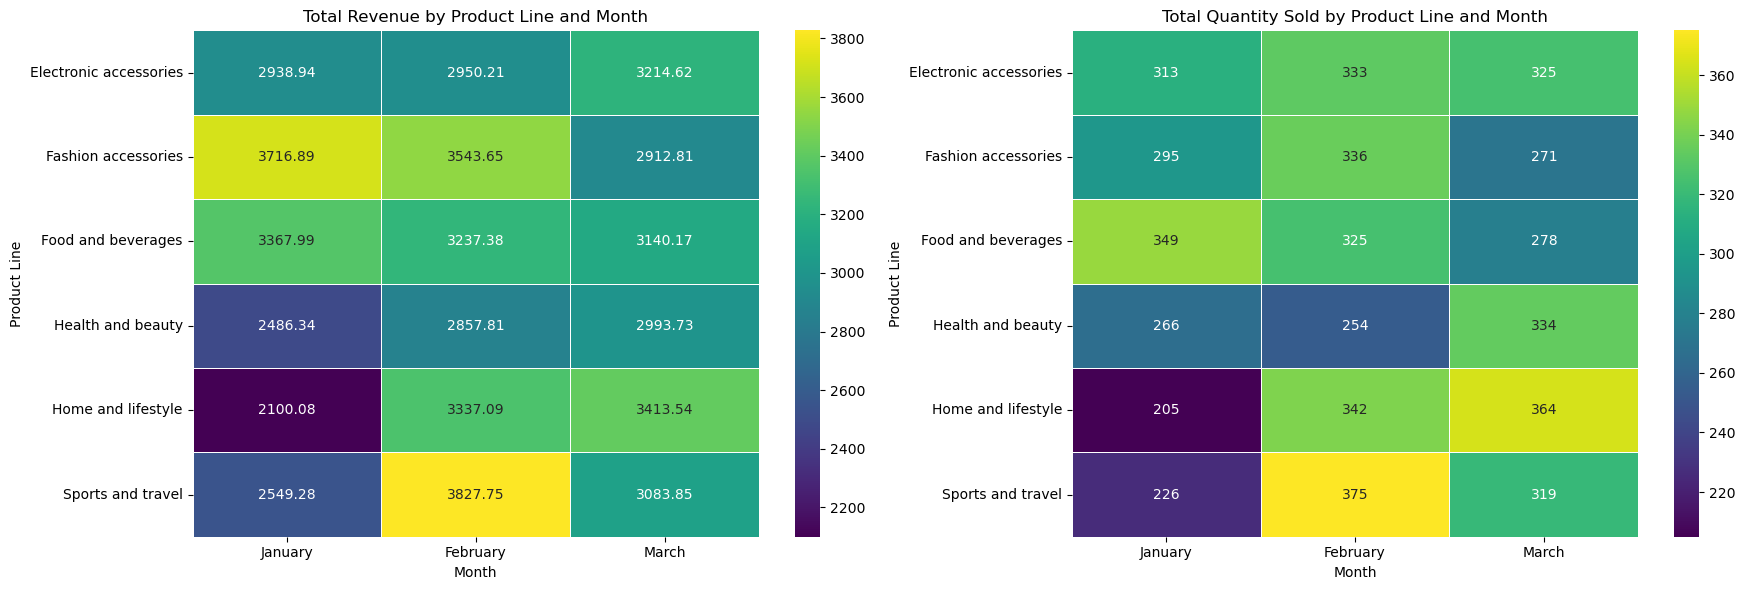

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the order of months
month_order = [calendar.month_name[1], calendar.month_name[2], calendar.month_name[3]]

# Get unique months present in the data
available_months = sales_analysis['Month'].unique()

# Create a list to store dataframes for each month
dataframes = []

# Calculate total revenue and quantity sold for each available month, distinguished by product line
for month in available_months:
    revenue_and_quantity_by_product_line = total_revenue_and_quantity_by_month(month)
    # Add month column
    revenue_and_quantity_by_product_line['Month'] = calendar.month_name[month]
    dataframes.append(revenue_and_quantity_by_product_line)

# Concatenate dataframes for each month
combined_df = pd.concat(dataframes)

# Reshape the dataframe for heatmap
heatmap_df_revenue = combined_df.pivot(index='Product line', columns='Month', values='Total Revenue')
heatmap_df_quantity = combined_df.pivot(index='Product line', columns='Month', values='Total Quantity Sold')

# Plot separate heatmaps for total revenue and total quantity sold
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.heatmap(heatmap_df_revenue, cmap='viridis', annot=True, fmt=".2f", linewidths=.5, xticklabels=month_order)
plt.title('Total Revenue by Product Line and Month')
plt.xlabel('Month')
plt.ylabel('Product Line')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
sns.heatmap(heatmap_df_quantity, cmap='viridis', annot=True, fmt="d", linewidths=.5, xticklabels=month_order)
plt.title('Total Quantity Sold by Product Line and Month')
plt.xlabel('Month')
plt.ylabel('Product Line')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


In [45]:
import calendar

# Define a function to calculate total quantity sold by gender and product line for each month
def total_quantity_sold_by_month_and_gender(month):
    # Filter sales_analysis for the specified month
    month_sales = sales_analysis[sales_analysis['Month'] == month]
    
    # Group by Gender and Product line and calculate total quantity sold for the specified month
    quantity_sold_by_gender_and_product_line = month_sales.groupby(['Gender', 'Product line'])['Total Quantity Sold'].sum().reset_index()
    
    return quantity_sold_by_gender_and_product_line

# Get unique months present in the data
available_months = sales_analysis['Month'].unique()

# Calculate and print total quantity sold by gender and product line for each available month
for month in available_months:
    quantity_sold_by_gender_and_product_line = total_quantity_sold_by_month_and_gender(month)
    month_name = calendar.month_name[month]
    print(f"Total Quantity Sold by Gender and Product Line for {month_name}:")
    print(quantity_sold_by_gender_and_product_line)
    print()



Total Quantity Sold by Gender and Product Line for January:
    Gender            Product line  Total Quantity Sold
0   Female  Electronic accessories                  149
1   Female     Fashion accessories                  197
2   Female      Food and beverages                  169
3   Female       Health and beauty                   96
4   Female      Home and lifestyle                  198
5   Female       Sports and travel                  210
6     Male  Electronic accessories                  184
7     Male     Fashion accessories                  139
8     Male      Food and beverages                  156
9     Male       Health and beauty                  158
10    Male      Home and lifestyle                  144
11    Male       Sports and travel                  165

Total Quantity Sold by Gender and Product Line for February:
    Gender            Product line  Total Quantity Sold
0   Female  Electronic accessories                  191
1   Female     Fashion accessories    

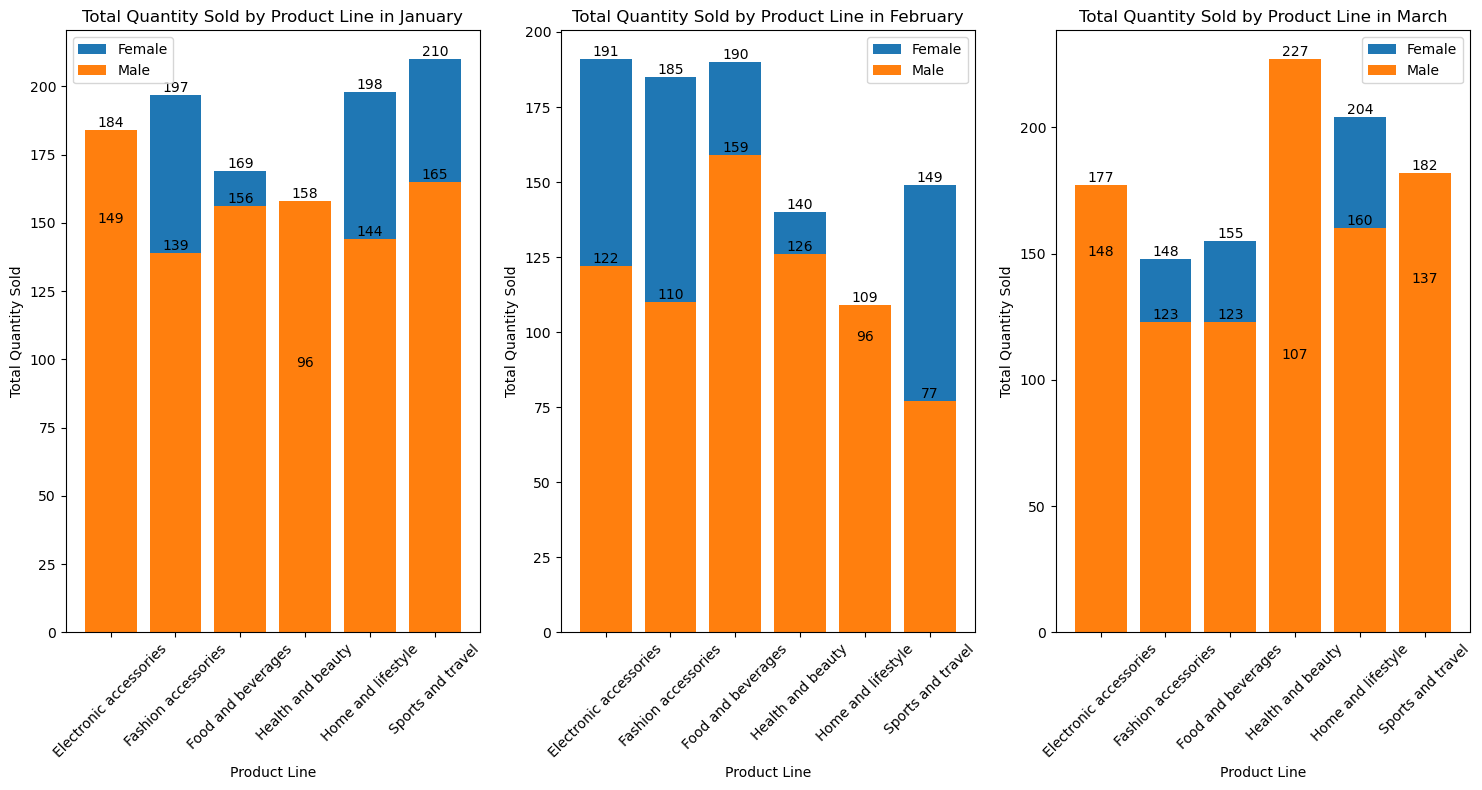

In [46]:
import calendar
import matplotlib.pyplot as plt

# Define a function to calculate total quantity sold by gender and product line for each month
def total_quantity_sold_by_month_and_gender(month):
    # Filter sales_analysis for the specified month
    month_sales = sales_analysis[sales_analysis['Month'] == month]
    
    # Group by Gender and Product line and calculate total quantity sold for the specified month
    quantity_sold_by_gender_and_product_line = month_sales.groupby(['Gender', 'Product line'])['Total Quantity Sold'].sum().reset_index()
    
    return quantity_sold_by_gender_and_product_line

# Get unique months present in the data
available_months = sales_analysis['Month'].unique()

# Set the figure size
plt.figure(figsize=(15, 8))

# Plot grouped bar charts for each available month
for idx, month in enumerate(available_months, start=1):
    quantity_sold_by_gender_and_product_line = total_quantity_sold_by_month_and_gender(month)
    month_name = calendar.month_name[month]
    
    # Plot the grouped bar chart for the current month
    plt.subplot(1, len(available_months), idx)
    for gender in quantity_sold_by_gender_and_product_line['Gender'].unique():
        data = quantity_sold_by_gender_and_product_line[quantity_sold_by_gender_and_product_line['Gender'] == gender]
        plt.bar(data['Product line'], data['Total Quantity Sold'], label=gender)
        
        # Annotate each bar with the total quantity sold to female and male
        for i, val in enumerate(data['Total Quantity Sold']):
            plt.text(i, val, str(val), ha='center', va='bottom')

    plt.title(f'Total Quantity Sold by Product Line in {month_name}')
    plt.xlabel('Product Line')
    plt.ylabel('Total Quantity Sold')
    plt.xticks(rotation=45)
    plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [47]:
import calendar

# Define a function to calculate total quantity sold by payment method and product line for each month
def total_quantity_sold_by_month_and_payment(month):
    # Filter sales_analysis for the specified month
    month_sales = sales_analysis[sales_analysis['Month'] == month]
    
    # Group by Payment and Product line and calculate total quantity sold for the specified month
    quantity_sold_by_payment_and_product_line = month_sales.groupby(['Payment', 'Product line'])['Total Quantity Sold'].sum().reset_index()
    
    return quantity_sold_by_payment_and_product_line

# Get unique months present in the data
available_months = sales_analysis['Month'].unique()

# Calculate and print total quantity sold by payment method and product line for each available month
for month in available_months:
    quantity_sold_by_payment_and_product_line = total_quantity_sold_by_month_and_payment(month)
    month_name = calendar.month_name[month]
    print(f"Total Quantity Sold by Payment and Product Line for {month_name}:")
    print(quantity_sold_by_payment_and_product_line)
    print()


Total Quantity Sold by Payment and Product Line for January:
        Payment            Product line  Total Quantity Sold
0          Cash  Electronic accessories                  114
1          Cash     Fashion accessories                  100
2          Cash      Food and beverages                  130
3          Cash       Health and beauty                   76
4          Cash      Home and lifestyle                  121
5          Cash       Sports and travel                  167
6   Credit card  Electronic accessories                   97
7   Credit card     Fashion accessories                  104
8   Credit card      Food and beverages                  111
9   Credit card       Health and beauty                   88
10  Credit card      Home and lifestyle                   98
11  Credit card       Sports and travel                  124
12      Ewallet  Electronic accessories                  122
13      Ewallet     Fashion accessories                  132
14      Ewallet      Foo

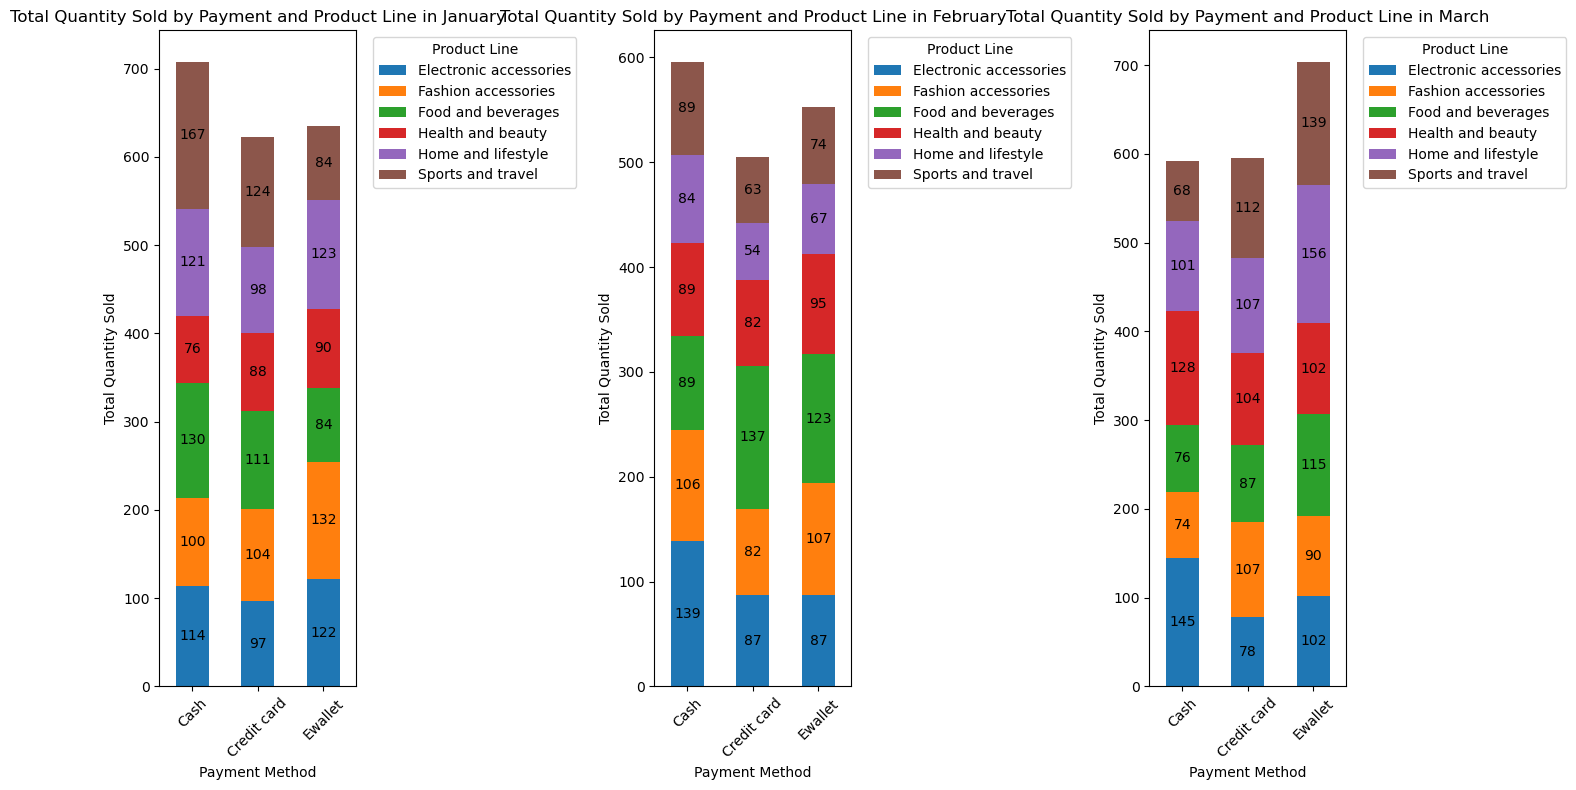

In [48]:
import calendar
import matplotlib.pyplot as plt

# Define a function to calculate total quantity sold by payment method and product line for each month
def total_quantity_sold_by_month_and_payment(month):
    # Filter sales_analysis for the specified month
    month_sales = sales_analysis[sales_analysis['Month'] == month]
    
    # Group by Payment and Product line and calculate total quantity sold for the specified month
    quantity_sold_by_payment_and_product_line = month_sales.groupby(['Payment', 'Product line'])['Total Quantity Sold'].sum().unstack().fillna(0)
    
    return quantity_sold_by_payment_and_product_line

# Get unique months present in the data
available_months = sales_analysis['Month'].unique()

# Set the figure size
plt.figure(figsize=(15, 8))

# Plot stacked bar charts for each month
for idx, month in enumerate(available_months, start=1):
    quantity_sold_by_payment_and_product_line = total_quantity_sold_by_month_and_payment(month)
    month_name = calendar.month_name[month]
    
    # Plot the stacked bar chart for the current month
    ax = plt.subplot(1, len(available_months), idx)
    quantity_sold_by_payment_and_product_line.plot(kind='bar', stacked=True, ax=ax)
    plt.title(f'Total Quantity Sold by Payment and Product Line in {month_name}')
    plt.xlabel('Payment Method')
    plt.ylabel('Total Quantity Sold')
    plt.xticks(rotation=45)
    plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Add values on top of each segment
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.text(x + width/2, y + height/2, int(height), ha='center', va='center')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

